# Foundations of Computational Economics #30

by Fedor Iskhakov, ANU

<img src="_static/img/dag3logo.png" style="width:256px;">

## Cake eating in discrete world

<img src="_static/img/lecture.png" style="width:64px;">

<img src="_static/img/youtube.png" style="width:65px;">

[https://youtu.be/IwKxNceuar4](https://youtu.be/IwKxNceuar4)

Description: Cake eating problem setup. Solution “on the grid”.

### Cake eating problem

<img src="_static/img/cake.png" style="width:128px;">

  
- Cake of initial size $ W_0 $  
- How much of the cake to eat each period $ t $, $ c_t $?  
- Time is discrete, $ t=1,2,\dots,\infty $  
- What is not eaten in period $ t $ is left for the future $ W_{t+1}=W_t-c_t $  

### Model specification and parametrization

- **Choices of the decision maker**
  - How much cake to eat  
- **State space of the problem**
  - A full list of variables that are relevant to the choices in question  
- **Preferences of the decision maker**
  - Utility flow from cake consumption
  - Discount factor  
- **Beliefs of the decision agents about how the state will evolve**
  - Transition density/probabilities of the states
  - May be conditional on the choices  

### Preferences in the cake eating

Let the flow utility be given by

$$
u(c_{t})=\log(c_t)
$$

Overall goal is to maximize the discounted expected utility

$$
\max_{\{c_{t}\}_{0}^{\infty}}\sum_{t=0}^{\infty}\beta^{t}u(c_{t})
\longrightarrow \max
$$

### Value function

**Value function** $ V(W_t) $ = the maximum attainable
value given the size of cake $ W_t $ (in period $ t $)

- State space is given by single variable $ W_t $  
- Transition of the variable (**rather, beliefs**) depends on the choice  


$$
W_{t+1}=W_t-c_t
$$

### Bellman equation (recursive problem)

$$
\begin{eqnarray*}
  V(W_{0}) & = & \max_{\{c_{t}\}_{0}^{\infty}}\sum_{t=0}^{\infty}\beta^{t}u(c_{t}) \\
  & = & \max_{0 \le c_{0}\le W_0}\{u(c_{0})+\beta\max_{\{c_{t}\}_{1}^{\infty}}\sum_{t=1}^{\infty}\beta^{t-1}u(c_{t})\} \\
  & = & \max_{0 \le c_{0}\le W_0}\{u(c_{0})+\beta V(W_{1})\}
\end{eqnarray*}
$$

$$
V(W_{t})=\max_{0 \le c_{t} \le W_t}\big\{u(c_{t})+\beta V(\underset{=W_{t}-c_{t}}{\underbrace{W_{t+1}}})\big\}
$$

### Recap: components of the dynamic model

- **State variables** — vector of variables that describe all relevant
  information about the modeled decision process, $ W_t $  
- **Decision variables** — vector of variables describing the choices,
  $ c_t $  
- **Instantaneous payoff** — utility function, $ u(c_t) $, with
  time separable discounted utility  
- **Motion rules** — agent’s beliefs of how state variable evolve
  through time, conditional on choices, $ W_{t+1}=W_t-c_t $  
- **Value function** — maximum attainable utility, $ V(W_t) $  
- **Policy function** — mapping from state space to action space that
  returns the optimal choice, $ c^{\star}(W_t) $  

### Maybe we can find analytic solution?

- Start with a (good) guess of $ V(W)=A+B\log W $  
  $$
  \begin{eqnarray*}
  V(W) & = & \max_{c}\big\{u(c)+\beta V(W-c)\big\} \\
  A+B\log W & = & \max_{c} \big\{\log c+\beta(A+B\log (W-c)) \big\}
  \end{eqnarray*}
  $$
- Determine $ A $ and $ B $ and find the optimal rule for cake
  consumption.  
- This is only possible in **few** models!  

F.O.C. for $ c $

$$
\frac{1}{c} - \frac{\beta B}{W - c} = 0, \quad c = \frac {W} {1 + \beta B}, W - c = \frac {\beta B W} {1 + \beta B}
$$

Then we have

$$
A + B\log W = \log W + \log\frac{1}{1+\beta B} +
\beta A + \beta B \log W + \beta B \log\frac{\beta B}{1+\beta B}
$$

$$
\begin{eqnarray*}
A &=& \beta A + \log\frac{1}{1+\beta B} + \beta B \log\frac{\beta B}{1+\beta B} \\
B &=& 1 + \beta B
\end{eqnarray*}
$$

After some algebra

$$
c^{\star}(W) =  \frac {W} {1 + \beta B} = \frac {W} {1 + \frac{\beta}{1-\beta}} = (1-\beta)W
$$

$$
V(W) = \frac{\log(W)}{1-\beta} + \frac{\log(1-\beta)}{1-\beta} + \frac{\beta \log(\beta)}{(1-\beta)^2}
$$

### Bellman operator

The Bellman equation becomes operator in functional space

$$
T(V)(W) \equiv \max_{0 \le c \le W} \big[u(c)+\beta V(W-c)\big]
$$

The Bellman equations is then $ V(W) = T({V})(W) $, with the
solution given by the fixed point (solution to $ T({V}) = V $)

### Value function iterations (VFI)

- Start with an arbitrary guess $ V_0(W) $
  (will see next time that the initial guess is not important)  
- At each iteration $ i $ compute  


$$
\begin{eqnarray*}
V_i(W) = T(V_{i-1})(W) &=&
\max_{0 \le c \le W} \big\{u(c)+\beta V_{i-1}(W-c) \big \}  \\
c_{i-1}(W) &=&
\underset{0 \le c \le W}{\arg\max} \big\{u(c)+\beta V_{i-1}(W-c) \big \}
\end{eqnarray*}
$$

- Repeat until convergence  

### Numerical implementation of the Bellman operator

- Cake is continuous $ \rightarrow $ value function is a function
  of continuous variable  
- Solution: **discretize** $ W $
  Construct a *grid* (vector) of cake-sizes
  $ \vec{W}\in\{0,\dots\overline{W}\} $  


$$
V_{i}(\vec{W})=\max_{0 \le c \le \vec{W}}\{u(c)+\beta V_{i-1}(\vec{W}-c)\}
$$

- Compute value and policy function sequentially point-by-point  
- May need to compute the value function *between grid points*
  $ \Rightarrow $ Interpolation and function approximation  

### Can interpolation be avoided?

- Note that conditional on $ W_t $, the choice of $ c $ defines
  $ W_{t+1} $  
- Can replace $ c $ with $ W_{t+1} $ in Bellman equation so
  that **next period cake size is the decision variable**  
- Solving “on the grid”  

### Adjustment to the Bellman equation

$$
V_{i}(\vec{W})=\max_{0 \le \vec{W}' \le \vec{W}}\{u(\vec{W}-\vec{W}')+\beta V_{i-1}(\vec{W}')\}
$$

- Compute value and policy function sequentially point-by-point  
- Note that grid $ \vec{W}\in\{0,\dots\overline{W}\} $ is used
  twice: for state space and for decision space  


*Can you spot the potential problem?*

In [1]:
import numpy as np

class cake_ongrid():
    '''Simple class to implement cake eating problem on the grid'''

    def __init__(self,beta=.9, Wbar=10, ngrid=50):
        '''Initializer'''
        self.beta = beta    # Discount factor
        self.Wbar = Wbar    # Upper bound on cake size
        self.ngrid = ngrid  # Number of grid points
        self.epsilon = np.finfo(float).eps # smallest positive float number
        self.grid = np.linspace(self.epsilon,Wbar,ngrid) # grid for both state and decision space

    def bellman(self,V0):
        '''Bellman operator, V0 is one-dim vector of values on grid'''
        c = self.grid - self.grid[:,np.newaxis] # current state in columns and choices in rows
        c[c==0] = self.epsilon # add small quantity to avoid log(0)
        mask = c>0 # mask off infeasible choices
        matV1 = np.full((self.ngrid,self.ngrid),-np.inf) # init V with -inf
        matV0 = np.repeat(V0.reshape(self.ngrid,1),self.ngrid,1) #current value function repeated in columns
        matV1[mask] = np.log(c[mask])+self.beta*matV0[mask] # maximand of the Bellman equation
        V1 = np.amax(matV1,axis=0,keepdims=False) # maximum in every column
        c1 = self.grid - self.grid[np.argmax(matV1,axis=0)] # consumption (index of maximum in every column)
        return V1, c1

    def solve(self, maxiter=1000, tol=1e-4, callback=None):
        '''Solves the model using VFI (successive approximations)'''
        V0=np.log(self.grid) # on first iteration assume consuming everything
        for iter in range(maxiter):
            V1,c1=self.bellman(V0)
            if callback: callback(iter,self.grid,V1,c1) # callback for making plots
            if np.all(abs(V1-V0) < tol):
                break
            V0=V1
        else:  # when i went up to maxiter
            print('No convergence: maximum number of iterations achieved!')
        return V1,c1

In [2]:
model = cake_ongrid(beta=0.92,Wbar=10,ngrid=50)
V,c = model.solve()
print(c)

[0.         0.20408163 0.20408163 0.20408163 0.20408163 0.20408163
 0.20408163 0.20408163 0.20408163 0.20408163 0.20408163 0.20408163
 0.20408163 0.20408163 0.20408163 0.20408163 0.20408163 0.20408163
 0.20408163 0.20408163 0.20408163 0.20408163 0.20408163 0.20408163
 0.20408163 0.20408163 0.20408163 0.20408163 0.20408163 0.20408163
 0.20408163 0.20408163 0.20408163 0.20408163 0.20408163 0.20408163
 0.20408163 0.20408163 0.20408163 0.20408163 0.20408163 0.20408163
 0.20408163 0.20408163 0.20408163 0.20408163 0.20408163 0.20408163
 0.40816327 0.40816327]


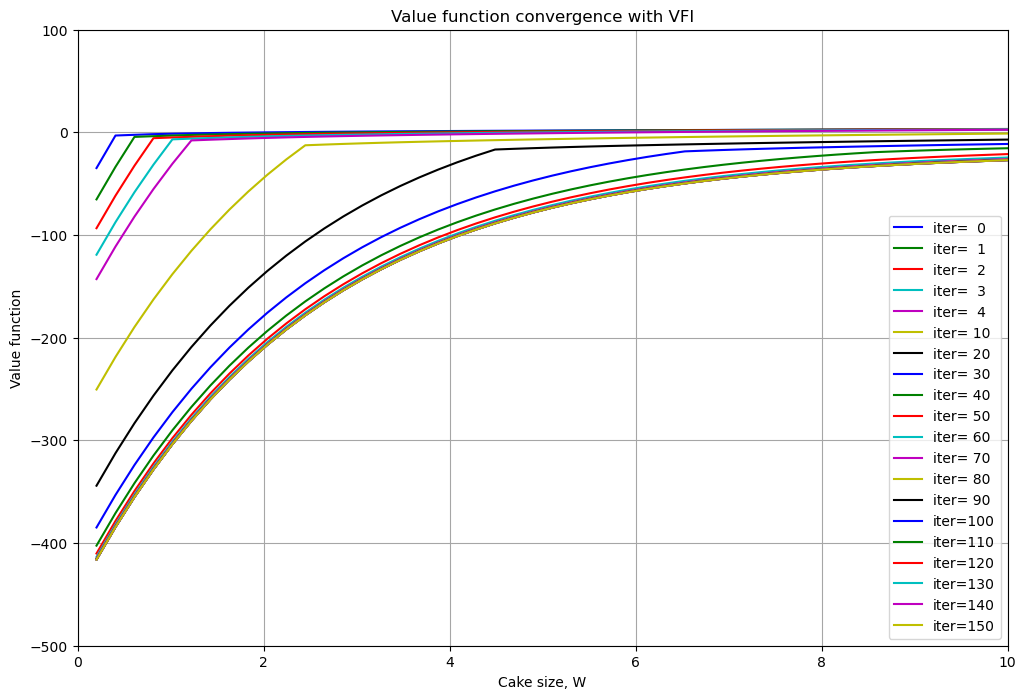

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['patch.force_edgecolor'] = True
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

fig1, ax1 = plt.subplots(figsize=(12,8))
plt.grid( which='both', color='0.65', linestyle='-')
ax1.set_title('Value function convergence with VFI')
ax1.set_xlabel('Cake size, W')
ax1.set_ylabel('Value function')

def callback(iter,grid,v,c):
    '''Callback function for DP solver'''
    if iter<5 or iter%10==0:
        ax1.plot(grid[1:],v[1:],label='iter={:3d}'.format(iter),linewidth=1.5)

V,c = model.solve(callback=callback)

plt.legend(loc=4)
# plt.savefig('cake1value.eps', format='eps', dpi=300)
plt.show()

### How to measure numerical errors?

- In our case there is an analytic solution  


$$
c^{\star}(W) = (1-\beta)W
$$

$$
V(W) = \frac{\log(W)}{1-\beta} + \frac{\log(1-\beta)}{1-\beta} + \frac{\beta \log(\beta)}{(1-\beta)^2}
$$

### When there is no analytic solution

We can find some **derived theoretical property** of the model
and check if it holds in the computed numerical solution

- Typically very dense (slow) grid is used in place of true solution  
- We’ll look at this in more detail later  

### Comparison of value function

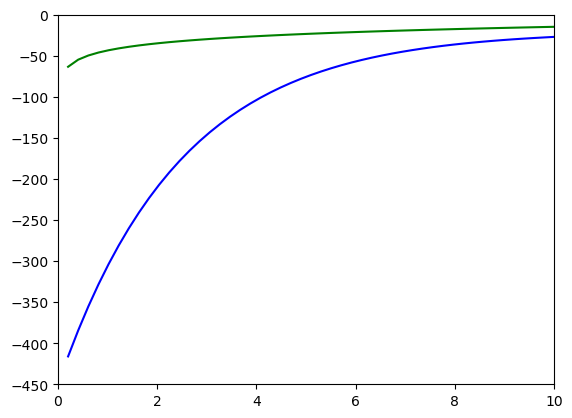

In [5]:
fun = lambda w: np.log(w)/(1 - model.beta) + np.log(1 - model.beta)/(1 - model.beta) + model.beta*np.log(model.beta)/((1 - model.beta)**2)
grid = model.grid
plt.plot(grid[1:],V[1:],linewidth=1.5)
plt.plot(grid[1:],fun(grid[1:]),linewidth=1.5)

### Comparison of policy function

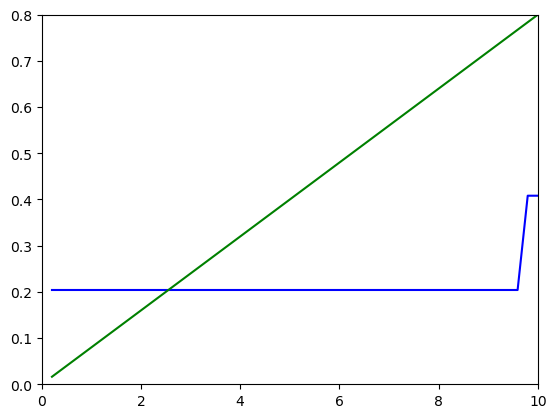

In [6]:
apol = lambda w: (1 - model.beta) * w
grid = model.grid
plt.plot(grid[1:],c[1:],linewidth=1.5)
plt.plot(grid[1:],apol(grid[1:]),linewidth=1.5)

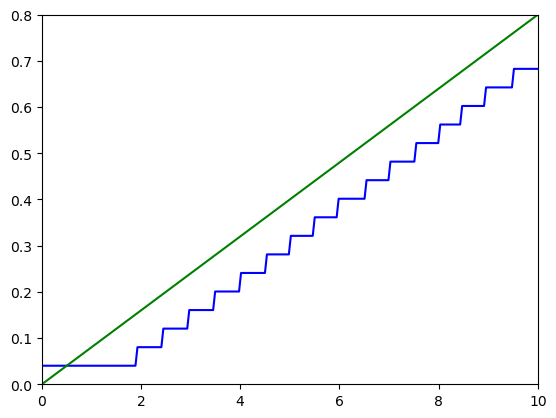

In [7]:
m = cake_ongrid(beta=0.92,Wbar=10,ngrid=250)
V,c = m.solve()
plt.plot(m.grid[1:],c[1:],linewidth=1.5)
plt.plot(m.grid[1:],apol(m.grid[1:]),linewidth=1.5)

### Conclusion

Solving “on the grid” allows to avoid interpolation of the value function,
but leads to huge inaccuracies for low levels of wealth!

#### Further learning resources

- 📖 Adda and Russell Cooper “Dynamic Economics. Quantitative Methods and Applications.” *Chapters: 2, 3.3*  
- QuantEcon DP section
  [https://lectures.quantecon.org/py/index_dynamic_programming.html](https://lectures.quantecon.org/py/index_dynamic_programming.html)  